## NEURALNETWORKSANDDEEPLEARNING/1 MODELPERFORMANCEANDFIT/NEURALNETWORKSANDDEEPLEARNING MODELPERFORMANCEANDFIT 2 EXERCISE ANSWERS ##
#### Exercise ####
#### Please refer to module 1 of NeuralNetworksAndDeepLearning - ModelPerformanceAndFit for tasks 1-7
#### Task 1 
##### Load the libraries that are used in this module.
#### Result:


In [1]:
# Helper packages.
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt                     
import numpy as np
import math
import seaborn as sns
# Scikit-learn packages.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
# TensorFlow and supporting packages.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


#### Task 2
##### Set the working directory to the data directory.
##### Print the working directory.
#### Result:


In [2]:
# Set 'main_dir' to location of the project folder
from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)


/Users/elliotstern/Library/CloudStorage/OneDrive-Personal/Data Society/intro neural nets
/Users/elliotstern/Library/CloudStorage/OneDrive-Personal/Data Society/intro neural nets/data


#### Task 3
##### Load the dataset `bank_marketing.csv` and save it to `bank_marketing`.
##### Print the first few rows of `bank_marketing`.
#### Result:


In [3]:
bank_marketing = pd.read_csv(data_dir + "/bank_marketing.csv")
bank_marketing.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


#### Task 4
##### Define a convenience function `ex_data_prep` to perform the data cleaning steps mentioned below:


In [ ]:
1. Replace the column `y` in the dataframe, by setting it to 1 if `y` is 'yes', otherwise set `y` to 0.
2. Perform one hot encoding on the variables with data type object (i.e `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week` and `poutcome`) except the target variable `y`
3. Drop the original variables and concatenate the dummies to the original dataset
4. Select the predictors by dropping variable `y` and save the result to a dataframe `X_ex`
5. Save the target variable `y` column to `y_ex` variable
6. Set the seed to 1
7. Split the data into training, test, and validation sets with 70:15:15 ratio and save respective variables to `X_train_ex`, `X_test_ex`, `X_val_ex`, `y_train_ex`, `y_test_ex`, `y_val_ex`
8. Scale the train, test and the validation datasets using Min max scaler and save as `X_train_scaled_ex`, `X_test_scaled_ex` and `X_val_scaled_ex` respectiely


#### Result:


In [5]:
def ex_data_prep(df):
    
    # Convert `y` to 0/1 values
    df['y'] = np.where(df['y'] == 'yes', 1, 0)
    
    
    # Perform one hot encoding
    job_dummy = pd.get_dummies(df['job'], prefix = 'job', drop_first = True)
    marital_dummy = pd.get_dummies(df['marital'], prefix = 'marital', drop_first = True)
    education_dummy = pd.get_dummies(df['education'], prefix = 'education', drop_first = True)
    default_dummy = pd.get_dummies(df['default'], prefix = 'default', drop_first = True)
    housing_dummy = pd.get_dummies(df['housing'], prefix = 'housing', drop_first = True)
    loan_dummy = pd.get_dummies(df['loan'], prefix = 'loan', drop_first = True)
    contact_dummy = pd.get_dummies(df['contact'], prefix = 'contact', drop_first = True)
    month_dummy = pd.get_dummies(df['month'], prefix = 'month', drop_first = True)
    day_of_week_dummy = pd.get_dummies(df['day_of_week'], prefix = 'day_of_week', drop_first = True)
    poutcome_dummy = pd.get_dummies(df['poutcome'], prefix = 'poutcome', drop_first = True)
    
    # Drop the original variables 
    df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 
                    'poutcome'], axis = 1, inplace = True)
    
    #Concatenate the dummies to original dataset
    df = pd.concat([df,job_dummy,marital_dummy,education_dummy,default_dummy,housing_dummy,loan_dummy
                            ,contact_dummy,month_dummy,day_of_week_dummy,poutcome_dummy], axis=1)
    
    # Separate predictors from target variable.
    X_ex = df.drop(['y'], axis=1)
    y_ex = df['y']
    
    # Set the seed to 1.
    np.random.seed(1)
    # Split data into train, test, and validation set, use a 70 - 15 - 15 split.
    # First split data into train-test with 70% for train and 30% for test.
    X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex.values,
                                                    y_ex,
                                                    test_size = .3,
                                                    random_state = 1)
    # Then split the test data into two halves: test and validation. 
    X_test_ex, X_val_ex, y_test_ex, y_val_ex = train_test_split(X_test_ex,
                                                y_test_ex,
                                                test_size = .5,
                                                random_state = 1)
    print("Train shape:", X_train_ex.shape, "Test shape:", X_test_ex.shape, "Val shape:", X_val_ex.shape)
    
    # Transforms features by scaling each feature to a given range.
    # The default is the range between 0 and 1.
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_scaled_ex = min_max_scaler.fit_transform(X_train_ex)
    X_test_scaled_ex = min_max_scaler.transform(X_test_ex)
    X_val_scaled_ex = min_max_scaler.transform(X_val_ex)
    
    return X_train_scaled_ex, X_test_scaled_ex, X_val_scaled_ex, y_train_ex, y_test_ex, y_val_ex
  
X_train_scaled_ex, X_test_scaled_ex, X_val_scaled_ex, y_train_ex, y_test_ex, y_val_ex = ex_data_prep(bank_marketing)
    


Train shape: (28831, 52) Test shape: (6178, 52) Val shape: (6179, 52)


In [7]:
X_train_scaled_ex.shape

(28831, 52)

#### Task 5
##### Initialize the sequential neural network model with 32 neurons for the 1st hidden layer, 32 neurons for the second layer, and appropriate input and output layers. Name the model `model`. 
##### Keep the learning rate at 0.01
##### Compile the model using the "adam" optimizer, "binary_crossentropy" loss, and using "accuracy" as a metric.
##### Print the summary of the model using the command `create_model().summary()`.
##### Result:


In [8]:
def create_model(lr=.01):
  opt = Adam(learning_rate=lr)
  model = Sequential([
          Dense(64, activation='relu', input_dim=52),
          Dense(32, activation='relu'),
          Dense(32, activation='relu'),
          Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=opt, loss='binary_crossentropy',
                       metrics=['accuracy'])
  return model
create_model().summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1696      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2785 (10.88 KB)
Trainable params: 2785 (10.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Task 6
##### Fit the model using train and validation sets with 25 epochs, default batch size, and assign it to `lr_default`, `lr_low` and `lr_high` variables for learning rate `0.01`, `0.0001`, and `0.75` respectively.
#### Result:
##### Default


In [9]:
# Learning rate is 0.01
lr_default = create_model().fit(X_train_scaled_ex, y_train_ex,
                                epochs=25,
                                validation_data=(X_val_scaled_ex, y_val_ex)
)


Epoch 1/25
901/901 [==============================] - 1s 699us/step - loss: 0.2419 - accuracy: 0.8993 - val_loss: 0.2000 - val_accuracy: 0.9063
Epoch 2/25
901/901 [==============================] - 0s 511us/step - loss: 0.1983 - accuracy: 0.9093 - val_loss: 0.1959 - val_accuracy: 0.9087
Epoch 3/25
901/901 [==============================] - 0s 508us/step - loss: 0.1942 - accuracy: 0.9098 - val_loss: 0.1901 - val_accuracy: 0.9118
Epoch 4/25
901/901 [==============================] - 0s 510us/step - loss: 0.1907 - accuracy: 0.9110 - val_loss: 0.2031 - val_accuracy: 0.9071
Epoch 5/25
901/901 [==============================] - 0s 512us/step - loss: 0.1880 - accuracy: 0.9120 - val_loss: 0.1996 - val_accuracy: 0.9061
Epoch 6/25
901/901 [==============================] - 1s 568us/step - loss: 0.1867 - accuracy: 0.9120 - val_loss: 0.1934 - val_accuracy: 0.9097
Epoch 7/25
901/901 [==============================] - 0s 512us/step - loss: 0.1838 - accuracy: 0.9142 - val_loss: 0.2045 - val_accuracy:

##### Low


In [10]:
# Learning rate is 0.0001
lr_low = create_model(lr=.0001).fit(X_train_scaled_ex, y_train_ex,
                                epochs=25,
                                validation_data=(X_val_scaled_ex, y_val_ex)
)


Epoch 1/25
901/901 [==============================] - 1s 562us/step - loss: 0.3378 - accuracy: 0.8879 - val_loss: 0.3082 - val_accuracy: 0.8846
Epoch 2/25
901/901 [==============================] - 0s 537us/step - loss: 0.2952 - accuracy: 0.8894 - val_loss: 0.2909 - val_accuracy: 0.8874
Epoch 3/25
901/901 [==============================] - 0s 513us/step - loss: 0.2835 - accuracy: 0.8958 - val_loss: 0.2820 - val_accuracy: 0.8925
Epoch 4/25
901/901 [==============================] - 0s 502us/step - loss: 0.2758 - accuracy: 0.8984 - val_loss: 0.2754 - val_accuracy: 0.8911
Epoch 5/25
901/901 [==============================] - 0s 493us/step - loss: 0.2689 - accuracy: 0.8993 - val_loss: 0.2693 - val_accuracy: 0.8930
Epoch 6/25
901/901 [==============================] - 0s 502us/step - loss: 0.2621 - accuracy: 0.9000 - val_loss: 0.2627 - val_accuracy: 0.8950
Epoch 7/25
901/901 [==============================] - 0s 494us/step - loss: 0.2550 - accuracy: 0.9012 - val_loss: 0.2559 - val_accuracy:

##### High


In [11]:
# Learning rate is 0.75
lr_high = create_model(lr=.75).fit(X_train_scaled_ex, y_train_ex,
                                epochs=25,
                                validation_data=(X_val_scaled_ex, y_val_ex)
)


Epoch 1/25
901/901 [==============================] - 1s 639us/step - loss: 0.7818 - accuracy: 0.8853 - val_loss: 0.3621 - val_accuracy: 0.8846
Epoch 2/25
901/901 [==============================] - 1s 597us/step - loss: 0.3588 - accuracy: 0.8881 - val_loss: 0.3622 - val_accuracy: 0.8846
Epoch 3/25
901/901 [==============================] - 0s 518us/step - loss: 0.3590 - accuracy: 0.8881 - val_loss: 0.3577 - val_accuracy: 0.8846
Epoch 4/25
901/901 [==============================] - 0s 502us/step - loss: 0.3586 - accuracy: 0.8881 - val_loss: 0.3577 - val_accuracy: 0.8846
Epoch 5/25
901/901 [==============================] - 0s 484us/step - loss: 0.3582 - accuracy: 0.8881 - val_loss: 0.3578 - val_accuracy: 0.8846
Epoch 6/25
901/901 [==============================] - 0s 504us/step - loss: 0.3590 - accuracy: 0.8881 - val_loss: 0.3808 - val_accuracy: 0.8846
Epoch 7/25
901/901 [==============================] - 0s 500us/step - loss: 0.3586 - accuracy: 0.8881 - val_loss: 0.3694 - val_accuracy:

#### Task 7
##### Create a dataframe with the loss and accuracy for training and validation data along with their epoch and learning rates.
##### Plot the validation accuracy and loss curves for the models with different learning rates to analyze and compare the results.
#### Result:


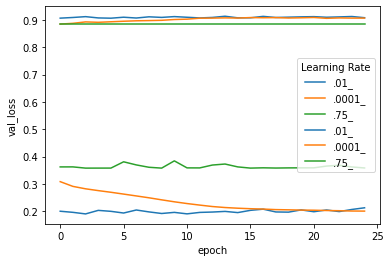

In [12]:
batch_sizes = []
for exp, result in zip([lr_default, lr_low, lr_high], [".01_", ".0001_", ".75_"]):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result
  batch_sizes.append(df)
df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);


#### Please refer to module 2 of NeuralNetworksAndDeepLearning - ModelPerformanceAndFit for tasks 8-12
#### Task 8
##### Initialize the sequential neural network model with 32 neurons for the 1st hidden layer, 32 neurons for the second layer, and appropriate input and output layers, name the model `model`. Keep the learning rate at 0.0001
##### Compile the model using the "adam" optimizer, "binary_crossentropy" loss, and using "accuracy" as a metric.
##### Print the summary of the model using the command `create_model().summary()`
#### Result:


In [13]:
def create_model(lr=.0001):
  opt = Adam(learning_rate=lr)
  model = Sequential([
          Dense(32, activation='relu', input_dim=52),
          Dense(32, activation='relu'),
          Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=opt, loss='binary_crossentropy',
                       metrics=['accuracy'])
  return model
create_model().summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                1696      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2785 (10.88 KB)
Trainable params: 2785 (10.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Task 9
##### Fit the model using train and validation sets with 25 epochs, default batch size, and assign it to `bt_default`, `bt_small` and `bt_large` variables for batch size `32`, `8` and `512` respectively.
#### Result:
##### Default
- Batch size is 32


In [14]:
model = create_model()
bt_default = model.fit(X_train_scaled_ex, y_train_ex,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_val_scaled_ex, y_val_ex))


Epoch 1/25
901/901 [==============================] - 1s 595us/step - loss: 0.3638 - accuracy: 0.8846 - val_loss: 0.3174 - val_accuracy: 0.8846
Epoch 2/25
901/901 [==============================] - 0s 512us/step - loss: 0.3014 - accuracy: 0.8889 - val_loss: 0.2970 - val_accuracy: 0.8875
Epoch 3/25
901/901 [==============================] - 0s 502us/step - loss: 0.2862 - accuracy: 0.8943 - val_loss: 0.2864 - val_accuracy: 0.8904
Epoch 4/25
901/901 [==============================] - 0s 498us/step - loss: 0.2779 - accuracy: 0.8972 - val_loss: 0.2795 - val_accuracy: 0.8901
Epoch 5/25
901/901 [==============================] - 0s 495us/step - loss: 0.2716 - accuracy: 0.8987 - val_loss: 0.2737 - val_accuracy: 0.8924
Epoch 6/25
901/901 [==============================] - 0s 520us/step - loss: 0.2655 - accuracy: 0.8991 - val_loss: 0.2678 - val_accuracy: 0.8946
Epoch 7/25
901/901 [==============================] - 1s 578us/step - loss: 0.2591 - accuracy: 0.9015 - val_loss: 0.2612 - val_accuracy:

##### Small batch size
- Batch size is 8


In [15]:
model = create_model()
bt_small = model.fit(X_train_scaled_ex, y_train_ex,
                                epochs=25,
                                batch_size=8,
                                validation_data=(X_val_scaled_ex, y_val_ex))


Epoch 1/25
3604/3604 [==============================] - 2s 499us/step - loss: 0.3275 - accuracy: 0.8849 - val_loss: 0.2931 - val_accuracy: 0.8877
Epoch 2/25
3604/3604 [==============================] - 2s 504us/step - loss: 0.2809 - accuracy: 0.8962 - val_loss: 0.2783 - val_accuracy: 0.8904
Epoch 3/25
3604/3604 [==============================] - 2s 572us/step - loss: 0.2684 - accuracy: 0.8985 - val_loss: 0.2673 - val_accuracy: 0.8933
Epoch 4/25
3604/3604 [==============================] - 2s 491us/step - loss: 0.2559 - accuracy: 0.9003 - val_loss: 0.2551 - val_accuracy: 0.8950
Epoch 5/25
3604/3604 [==============================] - 2s 505us/step - loss: 0.2421 - accuracy: 0.9024 - val_loss: 0.2396 - val_accuracy: 0.8976
Epoch 6/25
3604/3604 [==============================] - 2s 481us/step - loss: 0.2277 - accuracy: 0.9048 - val_loss: 0.2263 - val_accuracy: 0.9021
Epoch 7/25
3604/3604 [==============================] - 2s 481us/step - loss: 0.2165 - accuracy: 0.9074 - val_loss: 0.2172 -

##### Large batch size
- Batch Size is 512


In [16]:
model = create_model()
bt_large = model.fit(X_train_scaled_ex, y_train_ex,
                                epochs=25,
                                batch_size=512,
                                validation_data=(X_val_scaled_ex, y_val_ex))


Epoch 1/25
57/57 [==============================] - 0s 2ms/step - loss: 0.7815 - accuracy: 0.2583 - val_loss: 0.7244 - val_accuracy: 0.4075
Epoch 2/25
57/57 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5681 - val_loss: 0.6260 - val_accuracy: 0.7184
Epoch 3/25
57/57 [==============================] - 0s 942us/step - loss: 0.5797 - accuracy: 0.8084 - val_loss: 0.5356 - val_accuracy: 0.8597
Epoch 4/25
57/57 [==============================] - 0s 964us/step - loss: 0.4925 - accuracy: 0.8782 - val_loss: 0.4517 - val_accuracy: 0.8827
Epoch 5/25
57/57 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8874 - val_loss: 0.3860 - val_accuracy: 0.8848
Epoch 6/25
57/57 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8881 - val_loss: 0.3488 - val_accuracy: 0.8848
Epoch 7/25
57/57 [==============================] - 0s 981us/step - loss: 0.3370 - accuracy: 0.8881 - val_loss: 0.3311 - val_accuracy: 0.8846
Epoch 8/25
57/

#### Task 10
##### Create a dataframe with the loss and accuracy for training and validation data along with their epoch and batch size.
##### Plot the validation accuracy and loss curves for the models with different batch size to analyze and compare the results.
#### Result:


In [22]:
bt_default.history

{'loss': [0.36377790570259094,
  0.301350861787796,
  0.2862134873867035,
  0.2779248356819153,
  0.271584153175354,
  0.26545485854148865,
  0.2590863108634949,
  0.25180235505104065,
  0.2440667450428009,
  0.23631638288497925,
  0.22903047502040863,
  0.22256408631801605,
  0.21714293956756592,
  0.21247389912605286,
  0.20899493992328644,
  0.20629440248012543,
  0.20407827198505402,
  0.20218291878700256,
  0.20084349811077118,
  0.19964464008808136,
  0.1983422338962555,
  0.19736771285533905,
  0.1963953822851181,
  0.19577111303806305,
  0.19476912915706635],
 'accuracy': [0.8846380710601807,
  0.8888696432113647,
  0.8943498134613037,
  0.897193968296051,
  0.8987201452255249,
  0.8991363644599915,
  0.9014602303504944,
  0.9026395082473755,
  0.9038881659507751,
  0.9054489731788635,
  0.906454861164093,
  0.9072872996330261,
  0.9080850481987,
  0.909125566482544,
  0.9095417857170105,
  0.9107904434204102,
  0.9113107323646545,
  0.9114841818809509,
  0.9122819304466248,
  

In [23]:
batch_sizes = []
for exp, result in zip([bt_default, bt_small, bt_large], ["32", "8", "512"]):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result
  batch_sizes.append(df)

In [24]:
df

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.781522,0.258264,0.724433,0.407509,0,512
1,0.673519,0.568069,0.625987,0.718401,1,512
2,0.579651,0.808366,0.535620,0.859686,2,512
3,0.492481,0.878221,0.451651,0.882667,3,512
4,0.415850,0.887413,0.386024,0.884771,4,512
5,0.363950,0.888072,0.348839,0.884771,5,512
6,0.336970,0.888072,0.331088,0.884609,6,512
7,0.324271,0.888072,0.322492,0.884609,7,512
8,0.317624,0.888072,0.317539,0.884609,8,512
9,0.313293,0.888037,0.313744,0.884771,9,512


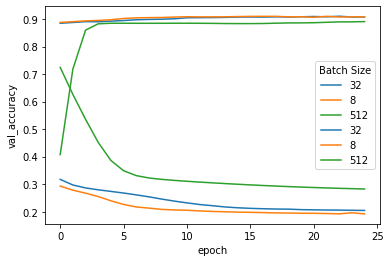

In [25]:
batch_sizes = []
for exp, result in zip([bt_default, bt_small, bt_large], ["32", "8", "512"]):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result
  batch_sizes.append(df)
df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);


#### Task 11
##### Fit the model using train and validation sets with default batch size, learning rate and assign it to `epochs_medium`, `epochs_low` and `epochs_high` variables for number of epochs `100`, `50` and `200` respectively.
#### Result:
##### Medium
- Number of epochs are 100


In [26]:
model = create_model()
epochs_medium = model.fit(X_train_scaled_ex, y_train_ex,
                                epochs=100,
                                batch_size=32,
                                validation_data=(X_val_scaled_ex, y_val_ex))


Epoch 1/100
901/901 [==============================] - 1s 581us/step - loss: 0.3558 - accuracy: 0.8877 - val_loss: 0.3090 - val_accuracy: 0.8846
Epoch 2/100
901/901 [==============================] - 0s 515us/step - loss: 0.2977 - accuracy: 0.8889 - val_loss: 0.2917 - val_accuracy: 0.8880
Epoch 3/100
901/901 [==============================] - 0s 534us/step - loss: 0.2856 - accuracy: 0.8949 - val_loss: 0.2831 - val_accuracy: 0.8911
Epoch 4/100
901/901 [==============================] - 0s 516us/step - loss: 0.2785 - accuracy: 0.8977 - val_loss: 0.2776 - val_accuracy: 0.8925
Epoch 5/100
901/901 [==============================] - 0s 546us/step - loss: 0.2725 - accuracy: 0.8989 - val_loss: 0.2717 - val_accuracy: 0.8943
Epoch 6/100
901/901 [==============================] - 0s 523us/step - loss: 0.2664 - accuracy: 0.8993 - val_loss: 0.2654 - val_accuracy: 0.8961
Epoch 7/100
901/901 [==============================] - 1s 562us/step - loss: 0.2599 - accuracy: 0.9002 - val_loss: 0.2587 - val_ac

901/901 [==============================] - 0s 479us/step - loss: 0.1762 - accuracy: 0.9171 - val_loss: 0.1887 - val_accuracy: 0.9100
Epoch 58/100
901/901 [==============================] - 1s 585us/step - loss: 0.1758 - accuracy: 0.9176 - val_loss: 0.1890 - val_accuracy: 0.9102
Epoch 59/100
901/901 [==============================] - 1s 609us/step - loss: 0.1756 - accuracy: 0.9180 - val_loss: 0.1889 - val_accuracy: 0.9107
Epoch 60/100
901/901 [==============================] - 1s 630us/step - loss: 0.1752 - accuracy: 0.9176 - val_loss: 0.1886 - val_accuracy: 0.9110
Epoch 61/100
901/901 [==============================] - 1s 656us/step - loss: 0.1752 - accuracy: 0.9183 - val_loss: 0.1887 - val_accuracy: 0.9105
Epoch 62/100
901/901 [==============================] - 1s 589us/step - loss: 0.1749 - accuracy: 0.9185 - val_loss: 0.1885 - val_accuracy: 0.9110
Epoch 63/100
901/901 [==============================] - 0s 538us/step - loss: 0.1746 - accuracy: 0.9183 - val_loss: 0.1906 - val_accuracy

##### Low
- Number of epochs are 50


In [27]:
model = create_model()
epochs_low = model.fit(X_train_scaled_ex, y_train_ex,
                                epochs=50,
                                batch_size=32,
                                validation_data=(X_val_scaled_ex, y_val_ex))


Epoch 1/50
901/901 [==============================] - 1s 576us/step - loss: 0.3696 - accuracy: 0.8844 - val_loss: 0.3139 - val_accuracy: 0.8846
Epoch 2/50
901/901 [==============================] - 0s 506us/step - loss: 0.2989 - accuracy: 0.8885 - val_loss: 0.2936 - val_accuracy: 0.8853
Epoch 3/50
901/901 [==============================] - 0s 495us/step - loss: 0.2837 - accuracy: 0.8917 - val_loss: 0.2823 - val_accuracy: 0.8896
Epoch 4/50
901/901 [==============================] - 0s 524us/step - loss: 0.2748 - accuracy: 0.8971 - val_loss: 0.2755 - val_accuracy: 0.8901
Epoch 5/50
901/901 [==============================] - 0s 502us/step - loss: 0.2683 - accuracy: 0.8992 - val_loss: 0.2695 - val_accuracy: 0.8930
Epoch 6/50
901/901 [==============================] - 0s 500us/step - loss: 0.2624 - accuracy: 0.9007 - val_loss: 0.2641 - val_accuracy: 0.8943
Epoch 7/50
901/901 [==============================] - 0s 503us/step - loss: 0.2562 - accuracy: 0.9013 - val_loss: 0.2577 - val_accuracy:

##### High
- Number of epochs are 200


In [28]:
model = create_model()
epochs_high = model.fit(X_train_scaled_ex, y_train_ex,
                                epochs=200,
                                batch_size=32,
                                validation_data=(X_val_scaled_ex, y_val_ex))


Epoch 1/200
901/901 [==============================] - 1s 608us/step - loss: 0.3572 - accuracy: 0.8881 - val_loss: 0.3029 - val_accuracy: 0.8846
Epoch 2/200
901/901 [==============================] - 0s 518us/step - loss: 0.2908 - accuracy: 0.8892 - val_loss: 0.2847 - val_accuracy: 0.8878
Epoch 3/200
901/901 [==============================] - 0s 521us/step - loss: 0.2787 - accuracy: 0.8960 - val_loss: 0.2771 - val_accuracy: 0.8911
Epoch 4/200
901/901 [==============================] - 0s 504us/step - loss: 0.2719 - accuracy: 0.8990 - val_loss: 0.2720 - val_accuracy: 0.8958
Epoch 5/200
901/901 [==============================] - 0s 502us/step - loss: 0.2665 - accuracy: 0.9002 - val_loss: 0.2676 - val_accuracy: 0.8974
Epoch 6/200
901/901 [==============================] - 0s 497us/step - loss: 0.2611 - accuracy: 0.9017 - val_loss: 0.2623 - val_accuracy: 0.8982
Epoch 7/200
901/901 [==============================] - 0s 541us/step - loss: 0.2551 - accuracy: 0.9019 - val_loss: 0.2564 - val_ac

901/901 [==============================] - 0s 492us/step - loss: 0.1741 - accuracy: 0.9177 - val_loss: 0.1911 - val_accuracy: 0.9094
Epoch 58/200
901/901 [==============================] - 0s 530us/step - loss: 0.1738 - accuracy: 0.9183 - val_loss: 0.1907 - val_accuracy: 0.9087
Epoch 59/200
901/901 [==============================] - 0s 501us/step - loss: 0.1735 - accuracy: 0.9181 - val_loss: 0.1905 - val_accuracy: 0.9100
Epoch 60/200
901/901 [==============================] - 0s 527us/step - loss: 0.1732 - accuracy: 0.9183 - val_loss: 0.1905 - val_accuracy: 0.9095
Epoch 61/200
901/901 [==============================] - 0s 510us/step - loss: 0.1729 - accuracy: 0.9185 - val_loss: 0.1903 - val_accuracy: 0.9090
Epoch 62/200
901/901 [==============================] - 0s 473us/step - loss: 0.1727 - accuracy: 0.9186 - val_loss: 0.1907 - val_accuracy: 0.9100
Epoch 63/200
901/901 [==============================] - 0s 502us/step - loss: 0.1725 - accuracy: 0.9190 - val_loss: 0.1904 - val_accuracy

901/901 [==============================] - 0s 553us/step - loss: 0.1635 - accuracy: 0.9241 - val_loss: 0.1895 - val_accuracy: 0.9118
Epoch 114/200
901/901 [==============================] - 0s 478us/step - loss: 0.1633 - accuracy: 0.9250 - val_loss: 0.1902 - val_accuracy: 0.9108
Epoch 115/200
901/901 [==============================] - 0s 478us/step - loss: 0.1633 - accuracy: 0.9241 - val_loss: 0.1904 - val_accuracy: 0.9115
Epoch 116/200
901/901 [==============================] - 0s 501us/step - loss: 0.1632 - accuracy: 0.9245 - val_loss: 0.1904 - val_accuracy: 0.9118
Epoch 117/200
901/901 [==============================] - 0s 481us/step - loss: 0.1631 - accuracy: 0.9245 - val_loss: 0.1921 - val_accuracy: 0.9099
Epoch 118/200
901/901 [==============================] - 0s 479us/step - loss: 0.1630 - accuracy: 0.9250 - val_loss: 0.1903 - val_accuracy: 0.9121
Epoch 119/200
901/901 [==============================] - 0s 507us/step - loss: 0.1628 - accuracy: 0.9245 - val_loss: 0.1913 - val_ac

Epoch 169/200
901/901 [==============================] - 1s 558us/step - loss: 0.1571 - accuracy: 0.9283 - val_loss: 0.1944 - val_accuracy: 0.9099
Epoch 170/200
901/901 [==============================] - 0s 552us/step - loss: 0.1571 - accuracy: 0.9276 - val_loss: 0.1931 - val_accuracy: 0.9105
Epoch 171/200
901/901 [==============================] - 1s 555us/step - loss: 0.1570 - accuracy: 0.9279 - val_loss: 0.1918 - val_accuracy: 0.9107
Epoch 172/200
901/901 [==============================] - 1s 565us/step - loss: 0.1568 - accuracy: 0.9282 - val_loss: 0.1923 - val_accuracy: 0.9095
Epoch 173/200
901/901 [==============================] - 1s 560us/step - loss: 0.1566 - accuracy: 0.9285 - val_loss: 0.1927 - val_accuracy: 0.9110
Epoch 174/200
901/901 [==============================] - 1s 557us/step - loss: 0.1567 - accuracy: 0.9291 - val_loss: 0.1928 - val_accuracy: 0.9097
Epoch 175/200
901/901 [==============================] - 1s 555us/step - loss: 0.1565 - accuracy: 0.9283 - val_loss: 0

#### Task 12
##### Create a dataframe with the loss and accuracy for training and validation data along with their epochs.
##### Plot the validation accuracy and loss curves for the models with different number of epochs to analyze and compare the results.
#### Result:


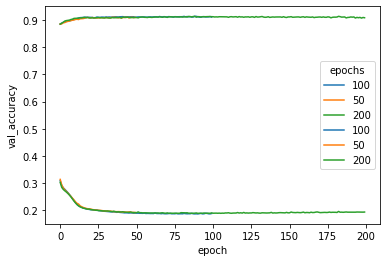

In [29]:
epochs_sizes = []
for exp, result in zip([epochs_medium, epochs_low, epochs_high], ["100", "50", "200"]):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['epochs'] = result
  epochs_sizes.append(df)
df = pd.concat(epochs_sizes)
df['epochs'] = df['epochs'].astype('str')
df.head()
sns.lineplot(x='epoch', y='val_accuracy', hue='epochs', data=df);
sns.lineplot(x='epoch', y='val_loss', hue='epochs', data=df);
